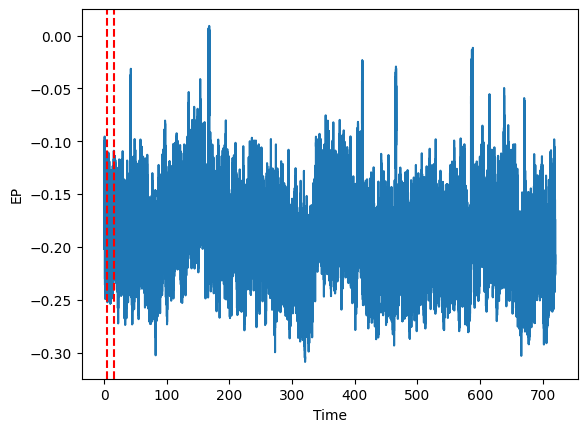

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv('/home/basti/DATEN/Universität/Bachelor/Projekt/Bachelor-Pr/Results/CSV/Final/RED/Measurements/P2/P2_2024-02-26 12_00_00_001.csv')

datetime_format = '%Y-%m-%d %H:%M:%S:%f'
data['timestamp'] = pd.to_datetime(data['timestamp'], format=datetime_format)
start_time = data['timestamp'].min()
data['time_passed'] = (data['timestamp'] - start_time).dt.total_seconds() / 60.0

'''
scaler = MinMaxScaler()
data_preprocessed = pd.DataFrame(scaler.fit_transform(data.iloc[:, 1:]), columns=data.columns[1:])
data_preprocessed.insert(0, 'timestamp', data['timestamp'])
sampled_data = data_preprocessed.iloc[::1, :]
'''

#plt.plot(sampled_data["timestamp"], sampled_data["differential_potential"])
plt.plot(data["time_passed"], data["differential_potential"])
plt.axvline(x=5, color='r', linestyle='--')
plt.axvline(x=15, color='r', linestyle='--')

plt.xlabel("Time")
plt.ylabel("EP")
plt.show() 

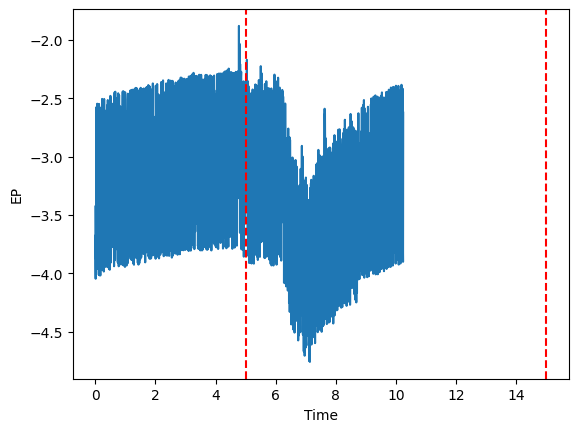

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/home/basti/DATEN/Universität/Bachelor/Projekt/Bachelor-Pr/Results/CSV/Wind_test/Measurements/P5/P5_2024-03-06 17:50:45:135.csv')

datetime_format = '%Y-%m-%d %H:%M:%S:%f'
data['timestamp'] = pd.to_datetime(data['timestamp'], format=datetime_format)

start_time = data['timestamp'].min()
data['time_passed'] = (data['timestamp'] - start_time).dt.total_seconds() / 60.0
sampled = data.iloc[::100,:]

plt.plot(sampled["time_passed"], sampled["differential_potential"])
plt.axvline(x=5, color='r', linestyle='--')
plt.axvline(x=15, color='r', linestyle='--')

plt.xlabel("Time")
plt.ylabel("EP")
plt.show() 

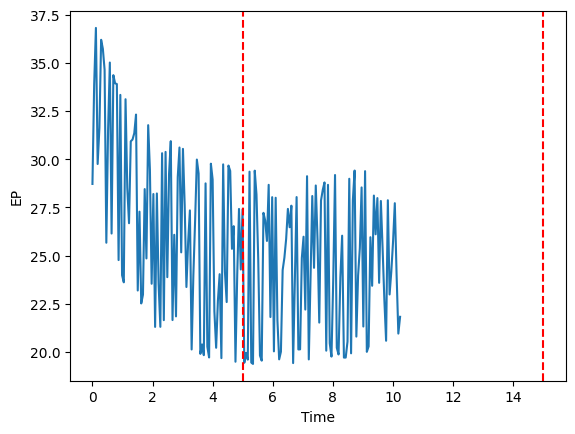

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

data = pd.read_csv('/home/basti/DATEN/Universität/Bachelor/Projekt/Bachelor-Pr/Results/CSV/Wind_test/Measurements/P9/P9_2024-03-06 17:50:45:106.csv')

datetime_format = '%Y-%m-%d %H:%M:%S:%f'
data['timestamp'] = pd.to_datetime(data['timestamp'], format=datetime_format)
start_time = data['timestamp'].min()
data['time_passed'] = (data['timestamp'] - start_time).dt.total_seconds() / 60.0
sampled = data.iloc[::1000, :]

'''
scaler = MinMaxScaler()
data_preprocessed = pd.DataFrame(scaler.fit_transform(data.iloc[:, 1:]), columns=data.columns[1:])
data_preprocessed.insert(0, 'timestamp', data['timestamp'])
sampled_data = data_preprocessed.iloc[::1, :]
'''


#plt.plot(sampled_data["timestamp"], sampled_data["differential_potential"])
plt.plot(sampled["time_passed"], sampled["differential_potential"])
plt.axvline(x=5, color='r', linestyle='--')
plt.axvline(x=15, color='r', linestyle='--')

plt.xlabel("Time")
plt.ylabel("EP")
plt.show()

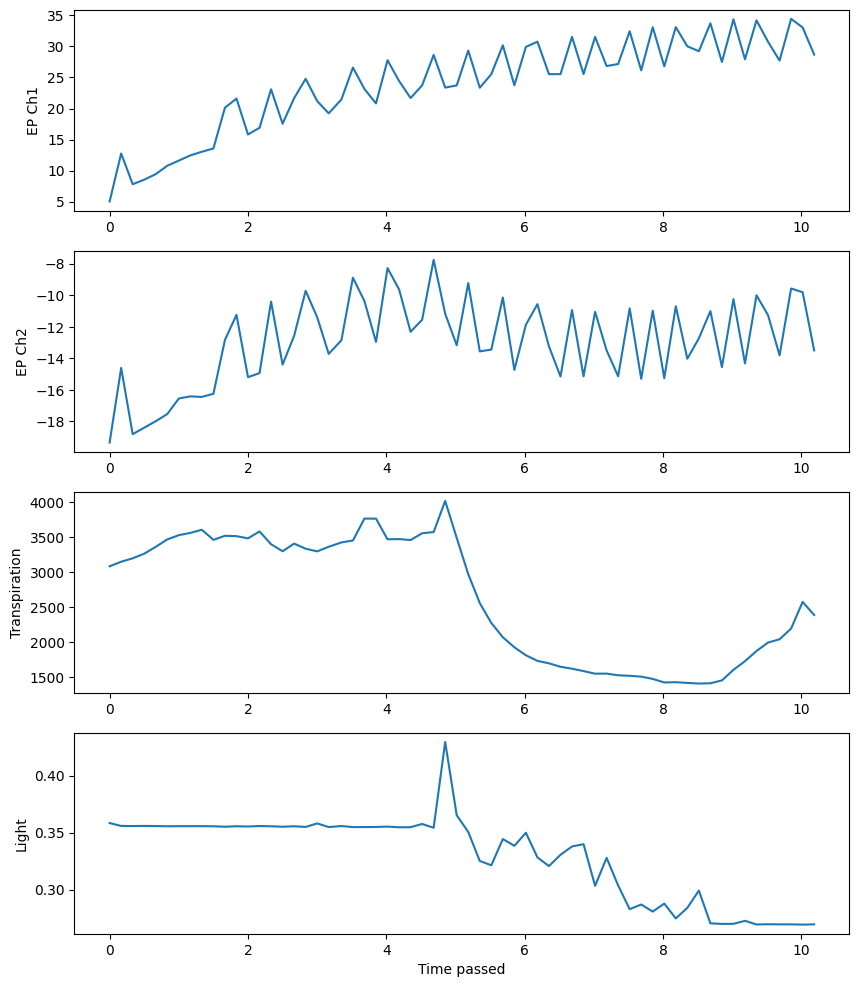

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data_cybres = pd.read_csv('/home/basti/DATEN/Universität/Bachelor/Projekt/Bachelor-Pr/Results/CSV/Wind_test/measurements/ttyACM0_2024_03_06-17_50_49.csv')

#data_cybres = data_cybres.drop(["sender_hostname", "MU_MM", "MU_ID", "temp_PCB", "mag_X", "mag_Y", "mag_Z", "temp_external", "humidity_external", "rf_power_emission", "air_pressure", "soil_moisture", "soil_temperature"], axis=1)
data_cybres = data_cybres.drop(["sender_hostname", "MU_MM", "MU_ID", "mag_X", "mag_Y", "mag_Z", "temp-PCB", "RF_power_emission", "air_pressure", "soil_moisture", "soil_temperature", "temp-external", "humidity-external"], axis=1)

'''
scaler = MinMaxScaler()
data_cybres_preprocessed = pd.DataFrame(scaler.fit_transform(data_cybres.iloc[:, 1:]), columns=data_cybres.columns[1:])
data_cybres_preprocessed.insert(0, 'timestamp', data_cybres['timestamp'])
'''

datetime_format = '%Y-%m-%d %H:%M:%S'
data_cybres['timestamp'] = pd.to_datetime(data_cybres['timestamp'], format=datetime_format)
start_time = data_cybres['timestamp'].min()
data_cybres['time_passed'] = (data_cybres['timestamp'] - start_time).dt.total_seconds() / 60.0


fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=False)

axes[0].plot(data_cybres["time_passed"], (data_cybres["differential_potential_CH1"]-512000) / 1000)
axes[0].set_ylabel("EP Ch1")

axes[1].plot(data_cybres["time_passed"], (data_cybres["differential_potential_CH2"]-512000) / 1000)
axes[1].set_ylabel("EP Ch2")

axes[2].plot(data_cybres["time_passed"], data_cybres["transpiration"])
axes[2].set_ylabel("Transpiration")

axes[3].plot(data_cybres["time_passed"], data_cybres["light-external"]/10000)
axes[3].set_ylabel("Light")

'''
for i in range(0,4):
    axes[i].axvline(x=80, color='r', linestyle='--')
    axes[i].axvline(x=90, color='r', linestyle='--')
    axes[i].axvline(x=210, color='r', linestyle='--')
    axes[i].axvline(x=220, color='r', linestyle='--')
    axes[i].axvline(x=340, color='r', linestyle='--')
    axes[i].axvline(x=350, color='r', linestyle='--')'''

axes[-1].set_xlabel("Time passed")


'''
plt.figure(figsize=(20,10))
plt.plot(data_cybres_preprocessed["timestamp"], data_cybres_preprocessed["differential_potential_CH1"], label="EP1")
plt.plot(data_cybres_preprocessed["timestamp"], data_cybres_preprocessed["differential_potential_CH2"], label="EP2")
plt.plot(data_cybres_preprocessed["timestamp"], data_cybres_preprocessed["transpiration"], label="trans")
plt.plot(data_cybres_preprocessed["timestamp"], data_cybres_preprocessed["light-external"], label="light")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.legend(loc = 'upper right')
'''
plt.show()


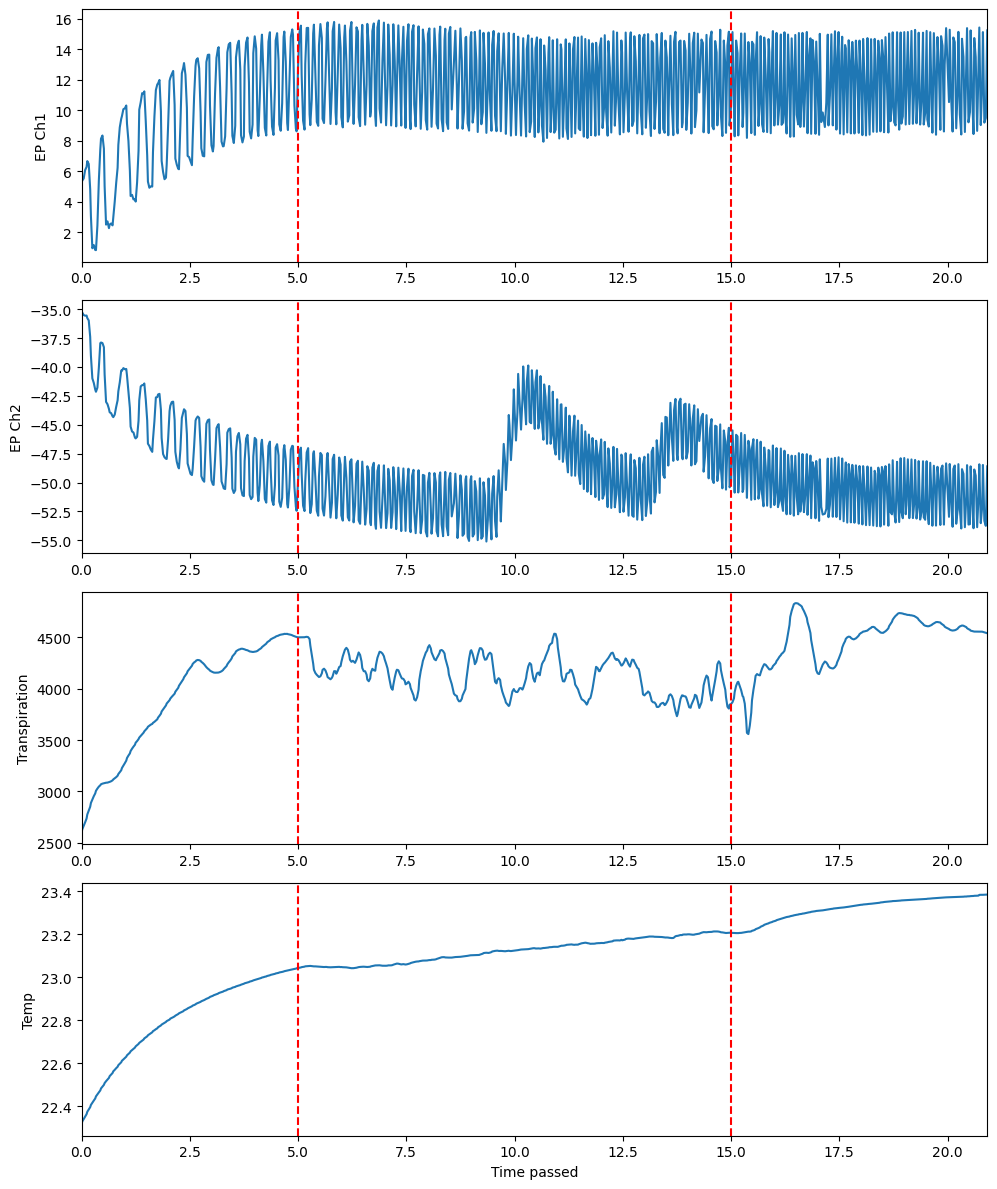

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

data_cybres = pd.read_csv('/home/basti/DATEN/Universität/Bachelor/Projekt/Bachelor-Pr/Results/Final/Control_test_wind/measurements/ttyACM0_2024_03_14-13_45_20.csv')
data_cybres = data_cybres.drop(["sender_hostname", "MU_MM", "MU_ID", "mag_X", "mag_Y", "mag_Z", "temp-PCB", "RF_power_emission", "air_pressure", "soil_moisture", "soil_temperature", "light-external", "humidity-external"], axis=1)


''''
scaler = MinMaxScaler()
data_cybres_preprocessed = pd.DataFrame(scaler.fit_transform(data_cybres.iloc[:, 1:]), columns=data_cybres.columns[1:])
data_cybres_preprocessed.insert(0, 'timestamp', data_cybres['timestamp'])

datetime_format = '%Y-%m-%d %H:%M:%S'
data_cybres_preprocessed['timestamp'] = pd.to_datetime(data_cybres_preprocessed['timestamp'], format=datetime_format)
start_time = data_cybres_preprocessed['timestamp'].min()
data_cybres_preprocessed['time_passed'] = (data_cybres_preprocessed['timestamp'] - start_time).dt.total_seconds() / 60.0
'''

datetime_format = '%Y-%m-%d %H:%M:%S'
data_cybres['timestamp'] = pd.to_datetime(data_cybres['timestamp'], format=datetime_format)
start_time = data_cybres['timestamp'].min()
data_cybres['time_passed'] = (data_cybres['timestamp'] - start_time).dt.total_seconds() / 60.0


fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=False)

axes[0].plot(data_cybres["time_passed"], (data_cybres["differential_potential_CH1"]-512000) / 1000)
axes[0].set_ylabel("EP Ch1")

axes[1].plot(data_cybres["time_passed"], (data_cybres["differential_potential_CH2"]-512000) / 1000)
axes[1].set_ylabel("EP Ch2")

axes[2].plot(data_cybres["time_passed"], data_cybres["transpiration"])
axes[2].set_ylabel("Transpiration")

axes[3].plot(data_cybres["time_passed"], data_cybres["temp-external"]/10000)
axes[3].set_ylabel("Temp")

for i in range(0,4):
    axes[i].axvline(x=5, color='r', linestyle='--')
    axes[i].axvline(x=15, color='r', linestyle='--')
    axes[i].set_xlim(0, data_cybres["time_passed"].max())

axes[-1].set_xlabel("Time passed")

'''
plt.figure(figsize=(20,10))
plt.plot(data_cybres_preprocessed["time_passed"], data_cybres_preprocessed["differential_potential_CH1"], label="EP1")
plt.plot(data_cybres_preprocessed["time_passed"], data_cybres_preprocessed["differential_potential_CH2"], label="EP2")
plt.plot(data_cybres_preprocessed["time_passed"], data_cybres_preprocessed["transpiration"], label="trans")
plt.plot(data_cybres_preprocessed["time_passed"], data_cybres_preprocessed["temp-external"], label="heat")
plt.xlabel("Time passed")
plt.legend(loc = 'upper right')
'''

plt.tight_layout()
plt.show()
